In [1]:
import pandas as pd
import numpy as np
import sklearn as sk
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn import metrics 

In [2]:
from sklearn.datasets import load_iris
iris = load_iris()

In [3]:
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [4]:
iris_data = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_data['species']=iris.target 

In [5]:
iris_data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [6]:
print(iris['DESCR'])

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [7]:
iris['data'][:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [8]:
iris['data'].shape

(150, 4)

In [9]:
iris['target']

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [10]:
pd.isnull(iris_data).any()

sepal length (cm)    False
sepal width (cm)     False
petal length (cm)    False
petal width (cm)     False
species              False
dtype: bool

In [11]:
iris_data.dtypes

sepal length (cm)    float64
sepal width (cm)     float64
petal length (cm)    float64
petal width (cm)     float64
species                int32
dtype: object

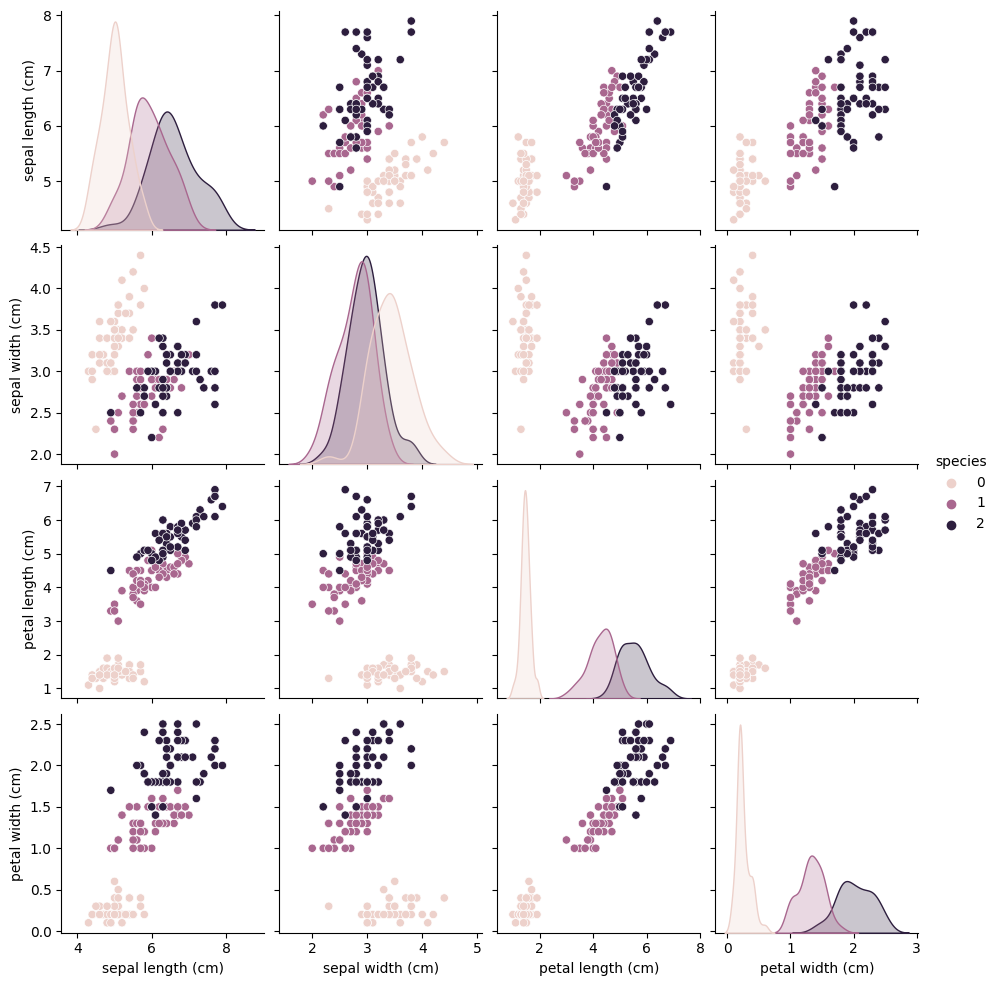

In [12]:
g = sns.pairplot(iris_data, hue='species')
g.fig.set_size_inches(10,10)

# Разделение данных на обучающие и тестирующие

In [13]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(iris['data'], iris ['target'], test_size=0.3, random_state=0)

In [14]:
x_train.shape

(105, 4)

In [15]:
x_test.shape

(45, 4)

# Метод KNN

In [16]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)

In [17]:
knn.fit(x_train, y_train)
y_pred=knn.predict(x_test)

In [18]:
prediction_output=pd.DataFrame(data=[y_test.data, y_pred], index=['Actual', 'Predicted'])
prediction_output.transpose()

,Actual,Predicted
0,2,2
1,1,1
2,0,0
3,2,2
4,0,0
5,2,2
6,0,0
7,1,1
8,1,1
9,1,1


In [19]:
from sklearn.metrics import accuracy_score
print ("accuracy: ", metrics.accuracy_score(y_test, y_pred))
print (metrics.classification_report(y_test, y_pred))

accuracy:  0.9777777777777777
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      0.94      0.97        18
           2       0.92      1.00      0.96        11

    accuracy                           0.98        45
   macro avg       0.97      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



# Метод дерева решений

In [20]:
from sklearn.model_selection import train_test_split
x_train1, x_test1, y_train1, y_test1 = train_test_split(iris['data'], iris ['target'], test_size=0.3, random_state=0)
from sklearn.tree import DecisionTreeClassifier
dectree=DecisionTreeClassifier()

In [21]:
dectree.fit(x_train1,y_train1)
y_pred1=dectree.predict(x_test1)

In [22]:
prediction_output1=pd.DataFrame(data=[y_test1.data, y_pred1], index=['Actual', 'Predicted'])
prediction_output1.transpose()

,Actual,Predicted
0,2,2
1,1,1
2,0,0
3,2,2
4,0,0
5,2,2
6,0,0
7,1,1
8,1,1
9,1,1


In [23]:
from sklearn.metrics import accuracy_score
print ("accuracy: ", metrics.accuracy_score(y_test1, y_pred1))
print (metrics.classification_report(y_test1, y_pred1))

accuracy:  0.9777777777777777
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      0.94      0.97        18
           2       0.92      1.00      0.96        11

    accuracy                           0.98        45
   macro avg       0.97      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



[Text(0.4, 0.9, 'x[3] <= 0.75\ngini = 0.664\nsamples = 105\nvalue = [34, 32, 39]'),
 Text(0.3, 0.7, 'gini = 0.0\nsamples = 34\nvalue = [34, 0, 0]'),
 Text(0.5, 0.7, 'x[2] <= 4.95\ngini = 0.495\nsamples = 71\nvalue = [0, 32, 39]'),
 Text(0.2, 0.5, 'x[3] <= 1.65\ngini = 0.161\nsamples = 34\nvalue = [0, 31, 3]'),
 Text(0.1, 0.3, 'gini = 0.0\nsamples = 30\nvalue = [0, 30, 0]'),
 Text(0.3, 0.3, 'x[1] <= 3.1\ngini = 0.375\nsamples = 4\nvalue = [0, 1, 3]'),
 Text(0.2, 0.1, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(0.4, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(0.8, 0.5, 'x[3] <= 1.75\ngini = 0.053\nsamples = 37\nvalue = [0, 1, 36]'),
 Text(0.7, 0.3, 'x[3] <= 1.65\ngini = 0.375\nsamples = 4\nvalue = [0, 1, 3]'),
 Text(0.6, 0.1, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(0.8, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(0.9, 0.3, 'gini = 0.0\nsamples = 33\nvalue = [0, 0, 33]')]

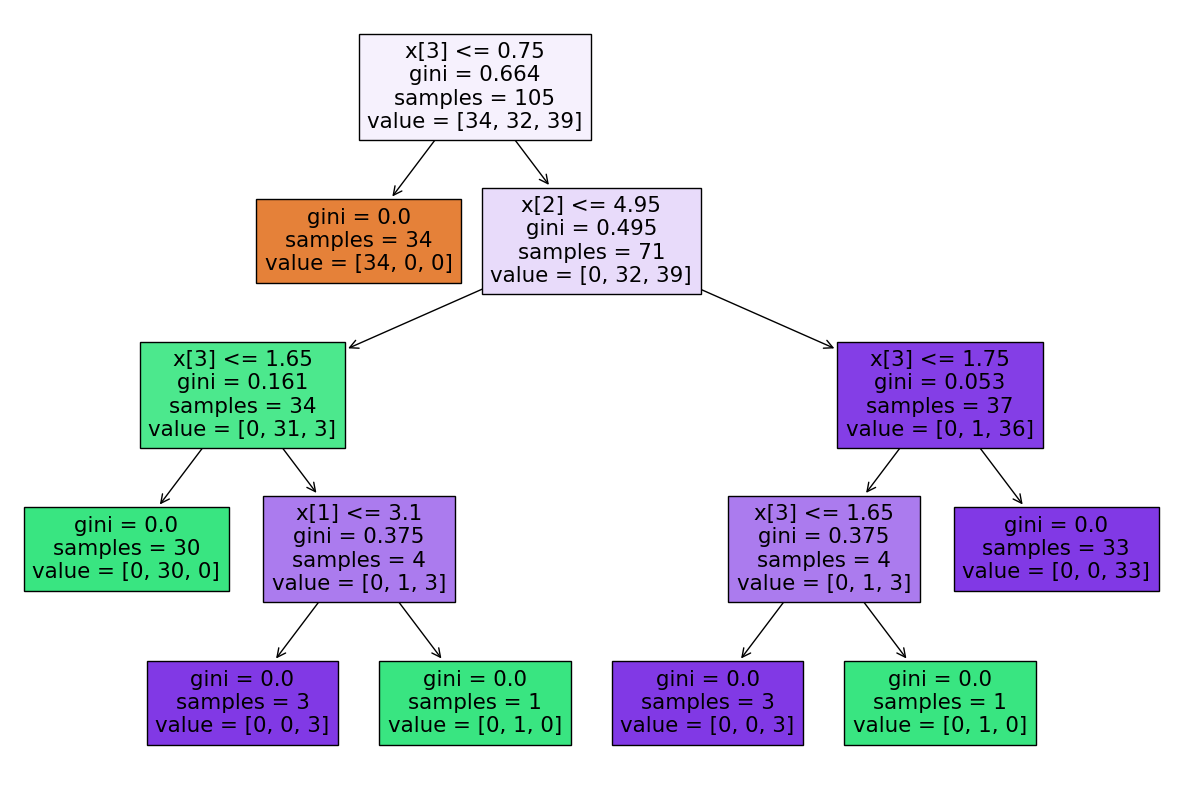

In [24]:
from sklearn import tree
fig=plt.figure(figsize=(15,10))
tree.plot_tree(dectree,filled=True)

# Нейронные сети

In [81]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler
import tensorflow as tf

In [139]:
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
X = iris['data']
Y = iris['target']
names = iris['target_names']
feature_names = iris['feature_names']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, stratify=y, random_state=0)
train_labels = to_categorical(Y_train)
test_labels = to_categorical(Y_test)

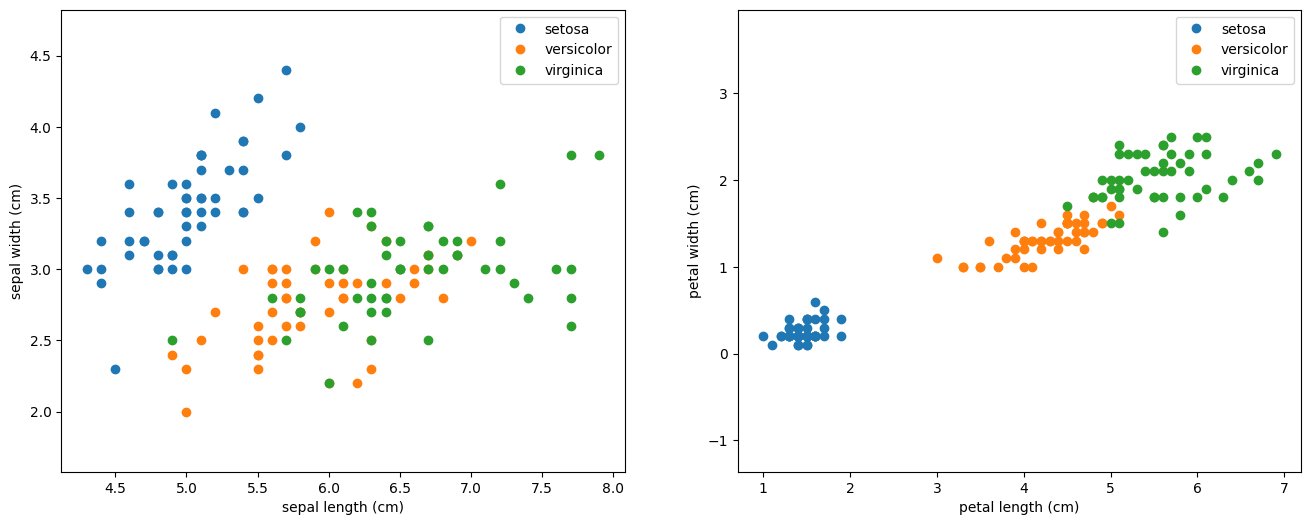

In [140]:
plt.figure(figsize=(16, 6))
plt.subplot(1, 2, 1)
for target, target_name in enumerate(names):
    X_plot = X[Y == target]
    plt.plot(X_plot[:, 0], X_plot[:, 1], linestyle='none', marker='o', label=target_name)
plt.xlabel(feature_names[0])
plt.ylabel(feature_names[1])
plt.axis('equal')
plt.legend();

plt.subplot(1, 2, 2)
for target, target_name in enumerate(names):
    X_plot = X[Y == target]
    plt.plot(X_plot[:, 2], X_plot[:, 3], linestyle='none', marker='o', label=target_name)
plt.xlabel(feature_names[2])
plt.ylabel(feature_names[3])
plt.axis('equal')
plt.legend();

In [141]:
model = Sequential()
model.add(Dense(10,input_shape=(4,),activation='relu'))
model.add(Dense(3,activation='softmax'))
model.compile(Adam(learning_rate=0.04),'categorical_crossentropy',metrics=['accuracy'])
model.summary()
model.summary()

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_40 (Dense)            (None, 10)                50        
                                                                 
 dense_41 (Dense)            (None, 3)                 33        
                                                                 
Total params: 83
Trainable params: 83
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_40 (Dense)            (None, 10)                50        
                                                                 
 dense_41 (Dense)            (None, 3)                 33        
                                                                 
Total params: 83
Trainable params:

In [142]:
iris_model = model.fit(X_train, train_labels, epochs=20, batch_size=40)

Epoch 1/20
3/3 [==============================] - 0s 4ms/step - loss: 0.9347 - accuracy: 0.4857
Epoch 2/20
3/3 [==============================] - 0s 0s/step - loss: 0.6382 - accuracy: 0.6667
Epoch 3/20
3/3 [==============================] - 0s 1ms/step - loss: 0.5622 - accuracy: 0.6762
Epoch 4/20
3/3 [==============================] - 0s 3ms/step - loss: 0.4882 - accuracy: 0.7905
Epoch 5/20
3/3 [==============================] - 0s 0s/step - loss: 0.4664 - accuracy: 0.9143
Epoch 6/20
3/3 [==============================] - 0s 542us/step - loss: 0.4030 - accuracy: 0.9333
Epoch 7/20
3/3 [==============================] - 0s 3ms/step - loss: 0.3829 - accuracy: 0.7810
Epoch 8/20
3/3 [==============================] - 0s 2ms/step - loss: 0.3558 - accuracy: 0.9143
Epoch 9/20
3/3 [==============================] - 0s 0s/step - loss: 0.3379 - accuracy: 0.9143
Epoch 10/20
3/3 [==============================] - 0s 1ms/step - loss: 0.2977 - accuracy: 0.9429
Epoch 11/20
3/3 [=======================

In [145]:
y_pred2=model.predict(X_test)
y_test_class = np.argmax(test_labels,axis=1)
y_pred_class = np.argmax(y_pred2,axis=1)

2/2 [==============================] - 0s 997us/step


In [146]:
y_pred2

array([[5.61380148e-07, 6.60305321e-02, 9.33968902e-01],
       [2.86951536e-06, 1.00187697e-01, 8.99809361e-01],
       [9.88492250e-01, 1.15076210e-02, 1.39207415e-07],
       [9.88192856e-01, 1.18069863e-02, 1.52371300e-07],
       [1.51194888e-03, 9.38776553e-01, 5.97115420e-02],
       [9.82315481e-01, 1.76840313e-02, 4.75816876e-07],
       [8.22461734e-04, 7.20584512e-01, 2.78593004e-01],
       [1.89660404e-05, 2.52923608e-01, 7.47057438e-01],
       [9.90330696e-01, 9.66915488e-03, 7.54934604e-08],
       [7.89587270e-04, 7.52082050e-01, 2.47128397e-01],
       [9.88952756e-01, 1.10471100e-02, 1.20580935e-07],
       [8.65787115e-06, 2.25722194e-01, 7.74269164e-01],
       [9.84131157e-01, 1.58684086e-02, 4.31816545e-07],
       [2.32813818e-05, 2.96469599e-01, 7.03507125e-01],
       [6.00195630e-03, 9.38073218e-01, 5.59248626e-02],
       [4.23235088e-06, 1.45757347e-01, 8.54238451e-01],
       [8.12478029e-05, 4.20990855e-01, 5.78927875e-01],
       [2.53049028e-03, 9.44566

In [147]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test_class,y_pred_class))
print(confusion_matrix(y_test_class,y_pred_class))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      0.93      0.97        15
           2       0.94      1.00      0.97        15

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45

[[15  0  0]
 [ 0 14  1]
 [ 0  0 15]]


In [152]:
X_test3 = np.array([[4.5, 3.3, 1.5, 0.4],[5,2.6,3.3,1],[7.6,3.5,6.5,2]]) #0, 1, 2
y_pred3 = model.predict(X_test3)
y_pred3

1/1 [==============================] - 0s 11ms/step


array([[9.8175943e-01, 1.8239837e-02, 7.0621473e-07],
       [3.3174172e-02, 9.3979234e-01, 2.7033487e-02],
       [6.1641083e-07, 1.3533755e-01, 8.6466187e-01]], dtype=float32)

In [153]:
print(np.argmax(y_pred3,axis=1))

[0 1 2]
